<a href="https://colab.research.google.com/github/samirgadkari/cia_factbook_analysis/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis, Approach, Results, Interpretation
Hypothesis: We can find the features that affect countries wealth and health.

Approach: 
1. Get data from the CIA factbook site: https://www.cia.gov/library/publications/the-world-factbook/
2. Extract data from HTML files.
3. For health, we selected these features:

  *  Infant mortality rate
  * HIV/AIDS prevalence in adults
4. For Wealth we selected features:
  *  GDP per capita
  *  Unemployment Rate
  *  Budget Revenues
  *  Budget Expenditures
  *  Industrial Production Growth Rate
  *  Exports in USD
  *  Imports in USD
  *  External debt
  
  
  Results:
  
 These features are statistically significant to Wealth of a nation:
 
   * Budget Revenues (statistic: -1.8, pvalue: 0.065)
   * Exports (statistic: -3.5, pvalue: 0.0005)
   * Imports (statistic: -1.8, pvalue: 0.073)
  
Usually we consider a pvalue < 0.05 as significant (especially for research). For medical research, pvalue of 0.01 and lesser is preferred. Since countries are really messy in terms of gathering and understanding data, and since there is a large human behavioral component to countries, getting a pvalue of 0.07, or 0,065 is really good.



Interpretation:

  *  Wealth of a nation is a zero-sum game.  You can buy goods from someone else within your country, and money just changes hands.  The wealth of the nation has not increased because of it.
  *  The only way to increase a nations' wealth is to provide goods and services to other nations.  Exports make a nation wealthier.
  *  Companies invest this revenue in the nation to get better efficiencies. Better efficiencies will allow you to keep more of what you earn from your trade.  We don't have an indicator of efficiencies in our dataset.
  *  Companies spend on industrial equipment from developed countries to increase their efficiency. This is why Imports are linked to a nations' wealth.
  *  When you earn more, you're taxed more by the government.  This is why the government Budget Revenues are correlated with the nations' wealth. 

# Importing data and libraries

In [0]:
import numpy as np
import pandas as pd

!pip install --upgrade seaborn
import seaborn as sns
sns.__version__

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


# Set DataFrame Display Options

In [0]:
pd.set_option('display.max_rows', 400)
pd.set_option('display.height', 400)
pd.set_option('display.width', 400)

# Load Data

## Note: Data is saved in files in the same directory as the notebook.  You should import all files in that directory and then run the following cell.

In [0]:
population = pd.read_csv('2119',
                        names = ['Country', 'Metric', 'Year',
                                 'Population'],
                        usecols = ['Country', 'Year',
                                   'Population'],
                        index_col = ['Country', 'Year'],
                        dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32,
                                  'Population': np.float64})
infant_mortality_rate = pd.read_csv('2091',
                          names = ['Country', 'Metric', 'Year', 
                                   'Infant Deaths per 1000 births'],
                          usecols = ['Country', 'Year', 
                                     'Infant Deaths per 1000 births'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Infant Deaths per 1000 births': np.float64},
                          header = None
                        )
land_use = pd.read_csv('2097',
                          names = ['Country', 'Metric', 'Year', 'Arable Land',
                                   'Permanent Crops', 'Other Land Use'],
                          usecols = ['Country', 'Year', 'Arable Land',
                                   'Permanent Crops', 'Other Land Use'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 'Arable Land': np.float64,
                                   'Permanent Crops': np.float64,
                                   'Other Land Use': np.float64},
                          header = None
                        )
age_structure = pd.read_csv('2010',
                          names = ['Country', 'Metric', 'Year', 
                                   'Percent of 0 to 14 years old',
                                   'Percent of 15 to 64 years old',
                                   'Percent of 65 and older'],
                          usecols = ['Country', 'Year',  
                                   'Percent of 0 to 14 years old',
                                   'Percent of 15 to 64 years old',
                                   'Percent of 65 and older'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Percent of 0 to 14 years old': np.float64,
                                   'Percent of 15 to 64 years old': np.float64,
                                   'Percent of 65 and older': np.float64},
                          header = None
                        )
electricity_production = pd.read_csv('2038',
                          names = ['Country', 'Metric', 'Year', 
                                   'Electricity Produced in kWh'],
                          usecols = ['Country', 'Year', 
                                     'Electricity Produced in kWh'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Electricity Produced in kWh': np.float64},
                          header = None
                        )
irrigated_land = pd.read_csv('2146',
                          names = ['Country', 'Metric', 'Year', 
                                   'Irrigated Land in sq km'],
                          usecols = ['Country', 'Year', 
                                     'Irrigated Land in sq km'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Irrigated Land in sq km': np.float64},
                          header = None
                        )
aids_prevalence_rate = pd.read_csv('2155',
                          names = ['Country', 'Metric', 'Year', 
                                   'Percent of adults with HIV AIDS'],
                          usecols = ['Country', 'Year', 
                                     'Percent of adults with HIV AIDS'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Percent of adults with HIV AIDS': np.float64},
                          header = None
                        )
literacy_rate = pd.read_csv('2103',
                          names = ['Country', 'Metric', 'Year', 
                                   'Literacy Rate'],
                          usecols = ['Country', 'Year', 
                                     'Literacy Rate'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Literacy Rate': np.float64},
                          header = None
                        )
gdp_per_capita = pd.read_csv('2004',
                          names = ['Country', 'Metric', 'Year', 
                                   'GDP per capita'],
                          usecols = ['Country', 'Year', 
                                     'GDP per capita'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'GDP per capita': np.float64},
                          header = None
                        )
gdp_per_sector = pd.read_csv('2012',
                          names = ['Country', 'Metric', 'Year', 
                                   'GDP for Agriculture', 
                                   'GDP for Industry', 
                                   'GDP for Services'],
                          usecols = ['Country', 'Year', 
                                   'GDP for Agriculture', 
                                   'GDP for Industry', 
                                   'GDP for Services'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'GDP for Agriculture': np.float64,
                                   'GDP for Industry': np.float64,
                                   'GDP for Services': np.float64},
                          header = None
                        )
labor_force = pd.read_csv('2095',
                          names = ['Country', 'Metric', 'Year', 
                                   'Labor Force'],
                          usecols = ['Country', 'Year', 'Labor Force'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 'Labor Force': np.float64},
                          header = None
                        )
unemployment_rate = pd.read_csv('2129',
                          names = ['Country', 'Metric', 'Year', 
                                   'Unemployment Rate'],
                          usecols = ['Country', 'Year', 
                                     'Unemployment Rate'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Unemployment Rate': np.float64},
                          header = None
                        )
budget = pd.read_csv('2056',
                          names = ['Country', 'Metric', 'Year', 
                                   'Budget Revenues', 
                                   'Budget Expenditures'],
                          usecols = ['Country', 'Year', 
                                   'Budget Revenues', 
                                   'Budget Expenditures'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Budget Revenues': np.float64,
                                   'Budget Expenditures': np.float64},
                          header = None
                        )
industrial_production_growth_rate = pd.read_csv('2089',
                          names = ['Country', 'Metric', 'Year', 
                                   'Industrial Production Growth Rate'],
                          usecols = ['Country', 'Year', 
                                     'Industrial Production Growth Rate'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Industrial Production Growth Rate': np.float64},
                          header = None
                        )
exports = pd.read_csv('2078',
                          names = ['Country', 'Metric', 'Year', 'Exports in USD'],
                          usecols = ['Country', 'Year', 'Exports in USD'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 'Exports in USD': np.float64},
                          header = None
                        )
imports = pd.read_csv('2087',
                          names = ['Country', 'Metric', 'Year', 'Imports in USD'],
                          usecols = ['Country', 'Year', 'Imports in USD'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 'Imports in USD': np.float64},
                          header = None
                        )
external_debt = pd.read_csv('2079',
                          names = ['Country', 'Metric', 'Year', 'External debt'],
                          usecols = ['Country', 'Year', 'External debt'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 'External debt': np.float64},
                          header = None
                        )
economic_aid_recipient = pd.read_csv('2064',
                          names = ['Country', 'Metric', 'Year', 
                                   'Economic Aid received'],
                          usecols = ['Country', 'Year', 'Economic Aid received'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Economic Aid received': np.float64},
                          header = None
                        )
government_type = pd.read_csv('2128',
                          names = ['Country', 'Metric', 'Year', 
                                   'Type of Government'],
                          usecols = ['Country', 'Year', 'Type of Government'],
                          index_col = ['Country', 'Year'],
                          dtype = {'Country': str, 'Metric': np.int32,
                                   'Year': np.int32, 
                                   'Type of Government': str},
                          header = None
                        )

# Merge Dataframes

In [0]:
def add_columns_to_df(df1, df2):
  df1 = df1.reset_index()
  df2 = df2.reset_index()
  res = pd.merge(df1, df2, on = ['Country', 'Year'], how = 'outer')
  res = res.set_index(['Country', 'Year'])
  return res


all_data = add_columns_to_df(land_use, infant_mortality_rate)

add_dfs = [age_structure, electricity_production, irrigated_land,
            aids_prevalence_rate, literacy_rate, gdp_per_capita,
            gdp_per_sector, labor_force, unemployment_rate,
            budget, industrial_production_growth_rate, exports,
            imports, external_debt, economic_aid_recipient,
            government_type, population]
for df in add_dfs:
  all_data = add_columns_to_df(all_data, df)

all_data.sort_index(level = ['Country', 'Year'], inplace = True)
all_data.head(20)

Arable Land  Permanent Crops  Other Land Use  Infant Deaths per 1000 births  Percent of 0 to 14 years old  Percent of 15 to 64 years old  Percent of 65 and older  Electricity Produced in kWh  Irrigated Land in sq km  Percent of adults with HIV AIDS     ...      Unemployment Rate  Budget Revenues  Budget Expenditures  Industrial Production Growth Rate  Exports in USD  \
Country     Year                                                                                                                                                                                                                                                               ...                                                                                                                   
Afghanistan 1990          NaN              NaN             NaN                            NaN                           NaN                            NaN                      NaN                          NaN                      NaN                              NaN     ...                    NaN              NaN                  NaN                                NaN             NaN   
            1996          NaN              NaN             NaN                            NaN                           NaN                            NaN                      NaN                          NaN                      NaN                              NaN     ...                    NaN              NaN                  NaN                                NaN             NaN   
            1998        12.13             0.22           87.65                            NaN                           NaN                            NaN                      NaN                          NaN                  23860.0                              NaN     ...                    NaN              NaN                  NaN                                NaN             NaN   
            1999          NaN              NaN             NaN                            NaN                           NaN                            NaN                      NaN                          NaN                      NaN                             0.01     ...                    NaN              NaN                  NaN                                NaN             NaN   
            2000          NaN              NaN             NaN                            NaN                           NaN                            NaN                      NaN                  375000000.0                      NaN                              NaN     ...                    NaN              NaN                  NaN                                NaN             NaN   
            2001        12.13             0.22           87.65                            NaN                           NaN                            NaN                      NaN                  334800000.0                      NaN                             0.01     ...                    NaN              NaN                  NaN                                NaN    1.200000e+09   
            2002        12.13             0.22           87.65                         144.76                         42.00                          55.20                      2.8                  375000000.0                  23860.0                             0.01     ...                    NaN              NaN                  NaN                                NaN    1.200000e+09   
            2003        12.13             0.22           87.65                         142.48                         41.80                          55.40                      2.8                  334800000.0                  23860.0                             0.01     ...                    NaN     2.000000e+08         5.500000e+08                                NaN    1.200000e+09   
            2004        12.13             0.22           87.65                         165.96                         

# Understand the Data

In [0]:
print('Percentage of NAs in this data:', 
      all_data.isnull().sum().sum() / (all_data.shape[0] * all_data.shape[1]))
all_data.isnull().sum()

Percentage of NAs in this data: 0.4998662891300928


Arable Land                          1633
Permanent Crops                      1633
Other Land Use                       1646
Infant Deaths per 1000 births        2629
Percent of 0 to 14 years old         2584
Percent of 15 to 64 years old        2608
Percent of 65 and older              2624
Electricity Produced in kWh          2964
Irrigated Land in sq km              2382
Percent of adults with HIV AIDS      2857
Literacy Rate                        2940
GDP per capita                       1748
GDP for Agriculture                  2231
GDP for Industry                     2261
GDP for Services                     2265
Labor Force                          2234
Unemployment Rate                    2394
Budget Revenues                      2419
Budget Expenditures                  2455
Industrial Production Growth Rate    2793
Exports in USD                       1995
Imports in USD                       1994
External debt                        2235
Economic Aid received             

In [0]:
all_data.shape

(4890, 26)

## Count the number of NAs in this DataFrame

Each value in this table shows the number of values summed up across all features for each country and each year.  A '0' shows there were no values for this country/year.

In [0]:
nulls = pd.DataFrame(all_data.count(axis = 1))
nulls.reset_index(level = 'Year', inplace = True)
pivoted_nulls = nulls.pivot_table(index = nulls.index, 
                                  columns = 'Year', aggfunc = 'first')
pivoted_nulls.fillna(0, inplace = True)
pivoted_nulls.iloc[:, 12:].head()

0                                                                                      
Year            2002  2003  2004  2005  2006  2007  2008 2009 2010  2011 2012 2013  2014  2015  2016  2017
Country                                                                                                   
Afghanistan     21.0  22.0  24.0  23.0  23.0  25.0  25.0  0.0  0.0   4.0  9.0  7.0  10.0  22.0  22.0  22.0
Albania         24.0  24.0  24.0  24.0  24.0  24.0  24.0  0.0  0.0   3.0  2.0  9.0  13.0  23.0  23.0  23.0
Algeria         26.0  26.0  26.0  26.0  26.0  25.0  25.0  0.0  0.0   3.0  2.0  6.0  16.0  23.0  23.0  23.0
American Samoa  15.0  15.0  15.0  15.0  13.0  13.0  13.0  0.0  0.0   4.0  7.0  6.0   3.0  17.0  19.0  19.0
Andorra         16.0  16.0  16.0  16.0  16.0  17.0  17.0  1.0  1.0  10.0  7.0  1.0   6.0  18.0  22.0  22.0

## Corresponding heatmap of the NA values

The darker regions show less values.  The lighter regions show more values.

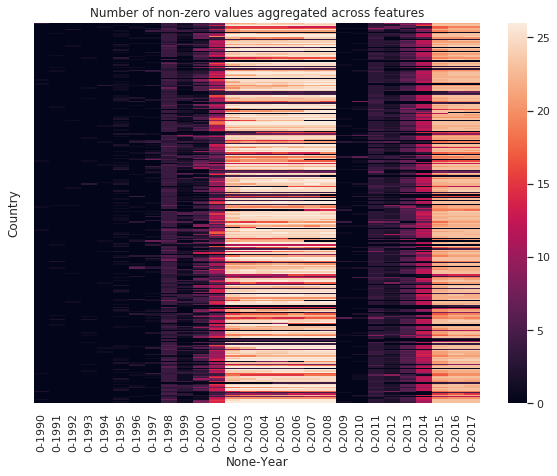

In [0]:
sns.set()
plt.figure(figsize = (10, 7))
ax = sns.heatmap(pivoted_nulls)
ax.set_yticklabels([])
ax.set_title('Number of non-zero values aggregated across features');

## We need to interpolate

The above graph tells us that we have a lot of NAs from 2009 through 2013.  This means we can compare countries by averaging the feature values around the year 2003 vs the same countries around the year 2016.

Let's get the average of all features for all countries for 2002 - 2005 (start DataFrame) and 2015 - 2017 (stop DataFrame).  Maybe this will work.


In [0]:
# mask = all_data.index.get_level_values(1).isin(['2002', '2003', '2004'])
# start = pd.DataFrame(all_data[mask].mean(axis = 1))
# mask = all_data.index.get_level_values(1).isin(['2015', '2016', '2017'])
# pd.DataFrame(all_data[mask]).mean(axis = 1)

idx = pd.IndexSlice
start = all_data.loc[idx[:, 2002:2004], idx[:]].groupby(level = 0).mean()
stop = all_data.loc[idx[:, 2015:2017], idx[:]].groupby(level = 0).mean()
stop.head()

,Arable Land,Permanent Crops,Other Land Use,Infant Deaths per 1000 births,Percent of 0 to 14 years old,Percent of 15 to 64 years old,Percent of 65 and older,Electricity Produced in kWh,Irrigated Land in sq km,Percent of adults with HIV AIDS,...,Labor Force,Unemployment Rate,Budget Revenues,Budget Expenditures,Industrial Production Growth Rate,Exports in USD,Imports in USD,External debt,Economic Aid received,Population
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,58.090000,2.090000,39.820000,112.826667,41.140000,22.373333,54.0,NaN,28640.000000,0.356667,...,7.826000e+06,35.000000,2.867333e+09,6.104000e+09,3.766667,1.318733e+09,8.451333e+09,NaN,NaN,33728418.0
Albania,43.486667,28.263333,28.250000,12.316667,18.400000,18.076667,54.0,NaN,2624.666667,0.060000,...,1.258333e+06,16.833333,3.264333e+09,3.769333e+09,2.633333,1.358267e+09,4.107667e+09,8.306333e+09,NaN,3043290.5
Algeria,17.333333,0.673333,81.933333,20.293333,29.040000,15.963333,54.0,NaN,8331.333333,0.380000,...,1.208000e+07,10.766667,5.808667e+10,7.787333e+10,3.566667,4.168667e+10,5.326667e+10,5.034333e+09,NaN,40616577.0
American Samoa,22.633333,81.500000,0.000000,9.496667,26.256667,19.053333,54.0,NaN,0.000000,NaN,...,1.609000e+04,29.800000,2.412000e+08,2.437000e+08,NaN,4.590000e+08,5.640000e+08,NaN,NaN,52849.0
Andorra,43.756667,34.000000,22.233333,3.616667,14.726667,9.526667,54.0,NaN,0.000000,NaN,...,3.729000e+04,3.900000,1.310000e+09,1.380667e+09,NaN,7.290333e+07,1.372333e+09,0.000000e+00,NaN,81312.5


## Result of Interpolating across 2002-2005, and 2015-2017

The average across 2002-2005, and 2015-2017 still does not provide enough data.

With this interpolation, we still have values for only 98 countries.  We need to do some overall interpolation.

## Let's do an overall interpolation

We will limit the interpolation to no more than 5 empty cells. We will do linear interpolation.

Countries are slow-moving creatures, so this should be fine.

In [0]:
print(start.isnull().sum().sum(), stop.isnull().sum().sum())
stop.interpolate(method = 'linear', limit = 5, inplace = True)
start.interpolate(method = 'linear', limit = 5, inplace = True)
print(start.isnull().sum().sum(), stop.isnull().sum().sum())

1393 1400
8 532


## Result of overall interpolation

With overall interpolation, we have values for 248 countries.
So go with interpolation for now.

We have limited interpolation to no more than 5 empty cells,
and we have made it linear.

Countries are slow-moving creatures, so this should be fine.

# Drop columns/rows you cannot use

These would be columns which you don't think are useful.

## Keep only the columns you want for Health/Wealth

These are the health features:
  * 'Infant Deaths per 1000 births', 'Percent of adults with HIV AIDS'

These are the wealth features:
  * 'GDP per capita'
  * 'Unemployment Rate'
  * 'Budget Revenues'
  * 'Budget Expenditures'
  * 'Industrial Production Growth Rate'
  * 'Exports in USD'
  * 'Imports in USD'
  * 'External debt'


In [0]:
start_health = start[['Infant Deaths per 1000 births', 
                     'Percent of adults with HIV AIDS']].copy()
stop_health  = stop[['Infant Deaths per 1000 births',
                    'Percent of adults with HIV AIDS']].copy()
start_wealth = start[['GDP per capita', 'Unemployment Rate', 
                     'Budget Revenues', 'Budget Expenditures',
                     'Industrial Production Growth Rate',
                     'Exports in USD', 'Imports in USD', 'External debt',
                     'Population']].copy()
stop_wealth = stop[['GDP per capita', 'Unemployment Rate', 
                     'Budget Revenues', 'Budget Expenditures',
                     'Industrial Production Growth Rate',
                     'Exports in USD', 'Imports in USD', 'External debt',
                     'Population']].copy()

In [0]:
start_wealth['Budget Revenues per capita'] = start['Budget Revenues'] \
                                              / start['Population']
start_wealth['Budget Expenditures per capita'] = start['Budget Expenditures'] \
                                                    / start['Population']
start_wealth['Exports in USD per capita'] = start['Exports in USD'] \
                                              / start['Population']
start_wealth['Imports in USD per capita'] = start['Imports in USD'] \
                                              / start['Population']
start_wealth['External debt per capita'] = start['External debt'] \
                                            / start['Population']

stop_wealth['Budget Revenues per capita'] = stop['Budget Revenues'] \
                                              / stop['Population']
stop_wealth['Budget Expenditures per capita'] = stop['Budget Expenditures'] \
                                                    / stop['Population']
stop_wealth['Exports in USD per capita'] = stop['Exports in USD'] \
                                              / stop['Population']
stop_wealth['Imports in USD per capita'] = stop['Imports in USD'] \
                                              / stop['Population']
stop_wealth['External debt per capita'] = stop['External debt'] \
                                            / stop['Population']

## Drop rows that have any NAs in them


If even after interpolating over 5 empty spaces, we still have such rows, we should not use them.

In [0]:
# Check the shape of our dataframes
print(start_health.dropna(subset = ['Infant Deaths per 1000 births', \
                                    'Percent of adults with HIV AIDS'], \
                   how = 'any').shape)
print(stop_health.dropna(subset = ['Infant Deaths per 1000 births', \
                                     'Percent of adults with HIV AIDS'], \
                   how = 'any').shape)


(268, 2)
(257, 2)


In [0]:
start_health['Percentage of Infant Deaths'] = \
  start_health['Infant Deaths per 1000 births'] / 1000.0
stop_health['Percentage of Infant Deaths'] = \
  stop_health['Infant Deaths per 1000 births'] / 1000.0
start_health.drop(labels = 'Infant Deaths per 1000 births',
                  axis = 1, inplace = True)
stop_health.drop(labels = 'Infant Deaths per 1000 births',
                 axis = 1, inplace = True)

In [0]:
# Drop any rows that have NULLs in them
start_health.dropna(subset = ['Percentage of Infant Deaths', \
                               'Percent of adults with HIV AIDS'], \
                   how = 'any', inplace = True)
stop_health.dropna(subset = ['Percentage of Infant Deaths', \
                               'Percent of adults with HIV AIDS'], \
                   how = 'any', inplace = True)

## Drop Countries that are not in both the Health and Wealth DataFrames

In [0]:
# Since stop_health has the lowest number of countries,
# limit all dataframes to those countries.
def limit_to_df_rows(df, limit_df):
  limit_df.reset_index(inplace = True)
  df.reset_index(inplace = True)
  df = df[df.Country.isin(limit_df.Country)]
  limit_df.set_index('Country', inplace = True)
  df.set_index('Country', inplace = True)
  return df

print(start_health.shape)
start_health = limit_to_df_rows(start_health, stop_health)
print(start_health.shape)
start_health.head()
start_wealth = limit_to_df_rows(start_wealth, stop_health)
stop_wealth  = limit_to_df_rows(stop_wealth, stop_health)

(268, 2)
(248, 2)


In [0]:
# These will be used later to compare against the Change in GDP.
# Maybe the change in GDP is related to one or more of these variables.
save_start_wealth = start_wealth.copy()
save_stop_wealth = stop_wealth.copy()

start_wealth.drop(['Budget Revenues', 'Budget Expenditures', \
                   'Exports in USD', 'Imports in USD', \
                   'External debt'], axis = 1, inplace = True)

stop_wealth.drop(['Budget Revenues', 'Budget Expenditures', \
                   'Exports in USD', 'Imports in USD', \
                   'External debt'], axis = 1, inplace = True)

In [0]:
start_wealth.dropna(how = 'any', inplace = True)
stop_wealth.dropna(how = 'any', inplace = True)
print(start_wealth.shape, stop_wealth.shape)

(249, 9) (256, 9)


In [0]:
stop_wealth = limit_to_df_rows(stop_wealth, start_wealth)
print(start_wealth.shape, stop_wealth.shape)

(249, 9) (249, 9)


In [0]:
health_data = pd.DataFrame( \
                     start_health['Percent of adults with HIV AIDS'] + \
                     start_health['Percentage of Infant Deaths'], \
                     columns = ['2002 Health'])
health_data['2017 Health'] = stop_health['Percent of adults with HIV AIDS'] + \
                              start_health['Percentage of Infant Deaths']
wealth_data = pd.DataFrame()
wealth_data['2002 Wealth'] = start_wealth['GDP per capita']
wealth_data['2017 Wealth'] = stop_wealth['GDP per capita']
data = pd.merge(health_data, wealth_data,
                      left_index = True, right_index = True,
                      how = 'inner')
# data.drop(axis = 1, labels = ['2002, 2017'])
data.head()

,2002 Health,2017 Health,2002 Wealth,2017 Wealth
Country,,,,
Albania,0.042743,0.092743,4466.666667,11700.000000
Algeria,0.126350,0.416350,5666.666667,14600.000000
American Samoa,1.423130,0.976463,8000.000000,13000.000000
Andorra,2.740727,1.557393,19000.000000,41433.333333
Angola,4.252660,2.332660,1643.333333,7100.000000


# First plots of the Data

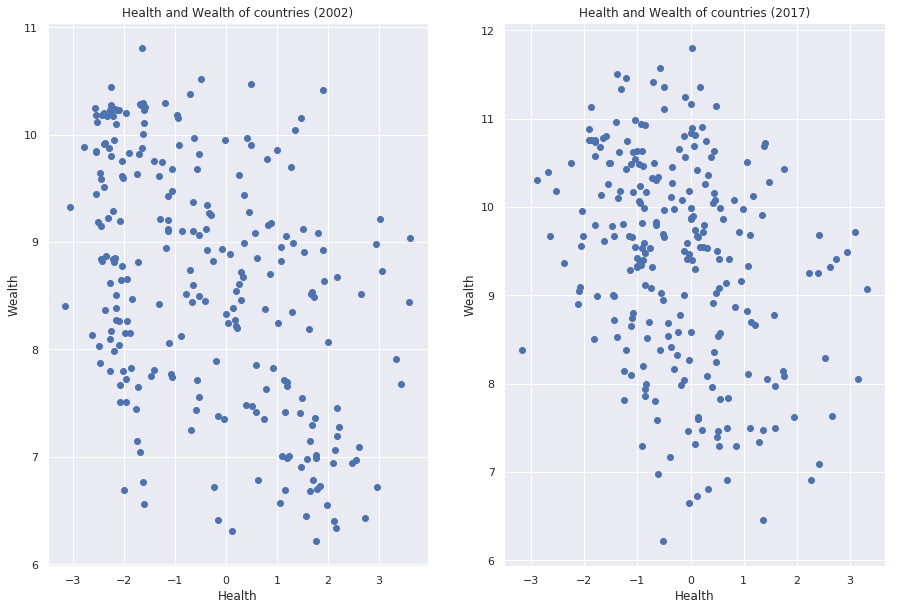

In [0]:
fig, ax = plt.subplots(1, 2, figsize = (15, 10))

plot_df = pd.DataFrame()
plot_df['2002 Health'] = np.log(data['2002 Health'])
plot_df['2002 Wealth'] = np.log(data['2002 Wealth'])
plot_df['2017 Health'] = np.log(data['2017 Health'])
plot_df['2017 Wealth'] = np.log(data['2017 Wealth'])
        
ax[0].scatter(plot_df['2002 Health'], plot_df['2002 Wealth']);
ax[1].scatter(plot_df['2017 Health'], plot_df['2017 Wealth']);

ax[0].set_xlabel('Health')
ax[0].set_ylabel('Wealth')
ax[1].set_xlabel('Health')
ax[1].set_ylabel('Wealth');

ax[0].set_title('Health and Wealth of countries (2002)');
ax[1].set_title('Health and Wealth of countries (2017)');

# Change in country Health/Wealth in a single plot

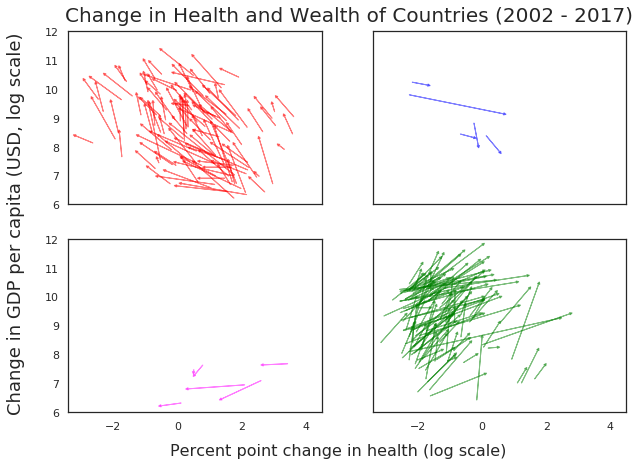

In [0]:
plot_df = pd.DataFrame()
plot_df['2002 Health'] = np.log(data['2002 Health'])
plot_df['2002 Wealth'] = np.log(data['2002 Wealth'])

sns.set_style('white')
fig, ax = plt.subplots(2, 2, figsize = (10,7), sharex = True, sharey = True)

fig.text(0.12, 0.9, 'Change in Health and Wealth of Countries (2002 - 2017)',
         fontsize = 20)
fig.text(0.5, 0.04, 'Percent point change in health (log scale)', 
         fontsize = 16, ha='center')
fig.text(0.04, 0.5, 'Change in GDP per capita (USD, log scale)', 
         fontsize = 18, va='center', rotation='vertical')

arrow_head_width  = 0.08
arrow_head_length = 0.08

ax[0, 0].set_xlim((-3.4, 4.5))
ax[0, 0].set_ylim((6, 12))
ax[0, 1].set_xlim((-3.4, 4.5))
ax[0, 1].set_ylim((6, 12))
ax[1, 0].set_xlim((-3.4, 4.5))
ax[1, 0].set_ylim((6, 12))
ax[1, 1].set_xlim((-3.4, 4.5))
ax[1, 1].set_ylim((6, 12))
arrow_begin_x  = np.log(data['2002 Health'].values)
arrow_begin_y  = np.log(data['2002 Wealth'].values)
delta_x        = np.log(data['2017 Health'].values) - arrow_begin_x
delta_y        = np.log(data['2017 Wealth'].values) - arrow_begin_y

for i in range(len(data['2002 Health'])):
  # print('bx, by, ex, ey', arrow_begin_x[i], arrow_begin_y[i], delta_x[i], delta_y[i])
  
  axis = ax[0, 0]
  color = ''
  if (delta_x[i] < 0.0) and (delta_y[i] < 0.0):
    color = 'magenta'
    axis = ax[1, 0]
  elif delta_x[i] < 0.0:
    color = 'red'
    axis = ax[0, 0]
  elif delta_y[i] < 0.0:
    color = 'blue'
    axis = ax[0, 1]
  else:
    color = 'green'
    axis = ax[1, 1]
    
  axis.plot(arrow_begin_x[i], arrow_begin_y[i], color = color)
  axis.arrow(arrow_begin_x[i], 
             arrow_begin_y[i], 
             delta_x[i],
             delta_y[i],
             head_width = arrow_head_width,
             head_length = arrow_head_length,
             fc = color,
             ec = color,
             alpha = 0.5)

plt.show()

## Drill down into separate plots for Health/Wealth as needed

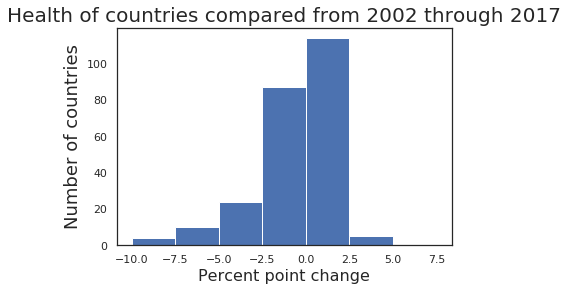

In [0]:
delta_health = pd.DataFrame(health_data['2017 Health'] - \
                            health_data['2002 Health'])
delta_health.columns = ['']
delta_wealth = pd.DataFrame(wealth_data['2017 Wealth'] - \
                            wealth_data['2002 Wealth'])
delta_wealth.columns = ['']

fig = plt.figure(figsize = (15, 10));

delta_health.hist(bins = [-10, -7.5, -5, -2.5, 0.0, 2.5, 5, 7.5], grid = False);
plt.xlabel('Percent point change', fontsize = 16);
plt.ylabel('Number of countries', fontsize = 18);
plt.title('Health of countries compared from 2002 through 2017', fontsize = 20);

From the histogram above, we can see that the health of around 200 countries has stayed around the same (within +/- 2.5%). There are around 40 countries whose health has deteriorated, and around 5 countries whose health got better by more than 2.5%.

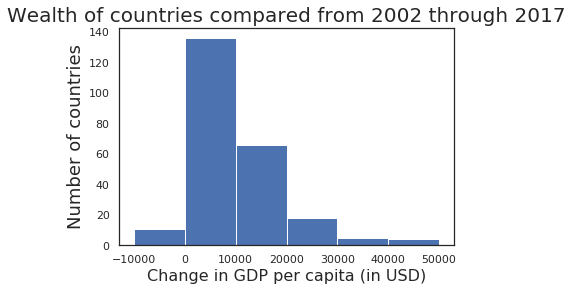

In [0]:
fig = plt.figure(figsize = (15, 10));
delta_wealth.hist(bins = [-10000, 0, 10000, 20000, 30000, 40000, 50000],
                  grid = False)
plt.xlabel('Change in GDP per capita (in USD)', fontsize = 16);
plt.ylabel('Number of countries', fontsize = 18);
plt.title('Wealth of countries compared from 2002 through 2017', 
             fontsize = 20);

From the histogram above, we can see that the Wealth of most countries has increased.  There are only around 10 countries whose wealth has decreased.  We will drill down some more into the 0-10000 USD range, and the 10000 - 20000 USD range to see what the distribution looks like.

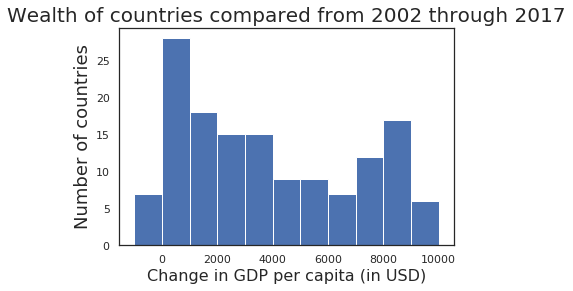

In [0]:
fig = plt.figure(figsize = (15, 10));
delta_wealth.hist(bins = [-1000, 0, 1000, 2000, 3000, 4000, 5000,
                          6000, 7000, 8000, 9000, 10000],
                  grid = False);
plt.xlabel('Change in GDP per capita (in USD)', fontsize = 16);
plt.ylabel('Number of countries', fontsize = 18);
plt.title('Wealth of countries compared from 2002 through 2017', 
             fontsize = 20);


The above graph shows countries are almost evenly distributed in GDP per capita for the 0 - 10000 USD range.

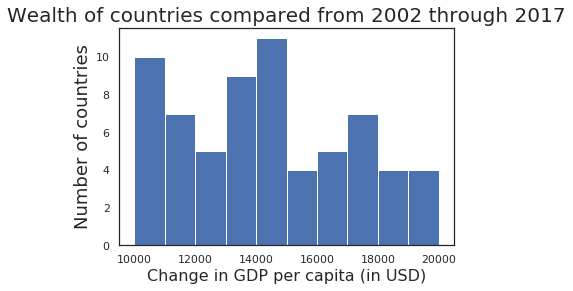

In [0]:
fig = plt.figure(figsize = (15, 10));
delta_wealth.hist(bins = [10000, 11000, 12000, 13000, 14000, 15000,
                          16000, 17000, 18000, 19000, 20000],
                  grid = False)
plt.xlabel('Change in GDP per capita (in USD)', fontsize = 16);
plt.ylabel('Number of countries', fontsize = 18);
plt.title('Wealth of countries compared from 2002 through 2017', 
             fontsize = 20);


The above graph shows countries are almost evenly distributed in GDP per capita for the 10000 - 20000 USD range.

# Compare the change in GDP per capita to each of the Wealth columns

This will tell us if we can predict which features contribute to a greater GDP.  A greater GDP should increase the amount of money in peoples pockets locally in that country.  It should then allow that person to at least do self-care (ex. taking off from work because they're sick, and not worrying about losing their jobs).  When enough money is in their hands, they will be able to pay a doctor to take care of them.

In [0]:
delta_health.columns = ['Change in GDP per capita']
delta_wealth.columns = ['Percent point change in wealth']

In [0]:
# Restore start and stop wealth to the earlier saved values
start_wealth = save_start_wealth
stop_wealth  = save_stop_wealth

# Get the deltas of all columns between start and stop wealth
delta_wealth_percent_diff = (stop_wealth - start_wealth) / start_wealth

In [0]:
delta_wealth_percent_diff.head()

,GDP per capita,Unemployment Rate,Budget Revenues,Budget Expenditures,Industrial Production Growth Rate,Exports in USD,Imports in USD,External debt,Population,Budget Revenues per capita,Budget Expenditures per capita,Exports in USD per capita,Imports in USD per capita,External debt per capita
Country,,,,,,,,,,,,,,
Afghanistan,1.681818,NaN,13.336667,10.098182,NaN,0.583747,6.029110,NaN,0.190602,11.041532,8.321491,0.330207,4.903831,NaN
Albania,1.619403,0.026423,2.555919,1.443916,-0.618357,2.687602,1.588866,7.367696,-0.144491,3.156493,1.856679,3.310416,2.026110,8.780952
Algeria,1.576471,-0.645833,1.636708,2.863403,-0.405556,0.955285,3.753123,-0.781148,0.253266,1.103869,2.082669,0.560151,2.792590,-0.825374
American Samoa,0.625000,3.966667,-0.978479,-0.976223,-0.292308,0.912500,0.647517,-0.864736,-0.194580,-0.973279,-0.970479,1.374536,1.045537,-0.832058
Andorra,1.180702,inf,2.402597,3.037037,-0.037500,0.256954,0.274219,-1.000000,0.176067,1.893200,2.432659,0.068777,0.083457,-1.000000


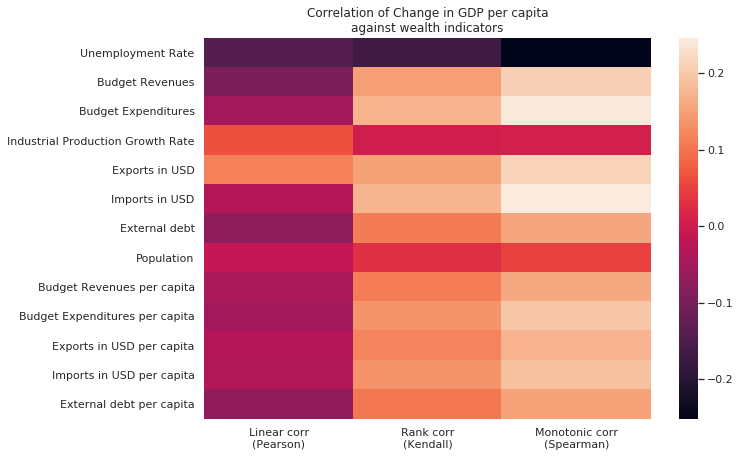

In [0]:
# Compare each column of the percentage change of the 2002 and 2017
# wealth indicators to the percentage change in GDP per capita.
#
pearson_corr = delta_wealth_percent_diff.corr('pearson'). \
                  iloc[0] # linear correlation
kendall_corr = delta_wealth_percent_diff.corr('kendall'). \
                  iloc[0] # rank correlation
spearman_corr = delta_wealth_percent_diff.corr('spearman'). \
                  iloc[0] # monotonic corr

corrs = pd.DataFrame()
corrs['Linear corr\n(Pearson)'] = pearson_corr
corrs['Rank corr\n(Kendall)'] = kendall_corr
corrs['Monotonic corr\n(Spearman)'] = spearman_corr
fig = plt.figure(figsize = (10, 7))
plt.title('Correlation of Change in GDP per capita\nagainst wealth indicators')
sns.heatmap(corrs[1:]);

The heatmap above shows there is very little linear correlation (first column of heatmap), between the GDP per capita and each of the wealth indicators.

There is more correlation between the rankings of GDP per capita, and each of the wealth indicators.

The monotonically increasing correlation coefficient shows the most correlation.

Specifically, the highest correlation seems to be between GDP per capita and Budget Revenues/Expenditures, Exports, and Imports